# Project 1: Sentiment Analysis on Movie Reviews

This project is an individual project. In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive 1 and 0 for negative).

**NOTE:**
* Please solve the problems in this notebook using the dataset `IBDM Dataset.csv`.
* Important Dates:
    * Project Start: Feb 19, Monday
    * Project Due: March 7, Thursday midnight
* Submission should include a pdf report (at least 4 pages) and code.
* There are always last minute issues submitting the project. DO NOT WAIT UNTIL THE LAST MINUTE!

**HINT:**
* Here are some related tutorials that would be helpful:
    * https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/code
    * https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html



# Data Exploration: Exploring the Dataset



In [30]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


It is interesting how the review column does not have 25000 unique reviews. This means that there are repeat reviews that might have to be filtered out such as the "top" review which appears 4 different times. We can also see that there are roughly the same amount of positive and negative reviews in this shortened version of the dataset

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Data Preproccessing

Here are some common preproccessing steps, feel free to add more preproccessing steps if needed:
1. check missing values.
2. remove noise and special characters, such as "\[[^]]*\]", etc.
3. transform all words to lower case,
4. word tokenization  
5. stop words removing and stemming,
6. divide the dataset into train set (75%) and test set (25%) with random sampling

 ......

**Hint:**
* You may need TfidVectorizer class to convert a collection of raw documents to a matrix of TF-IDF features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html,
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org).



In [33]:

df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [34]:
#remove duplicate rows
df_unique = df.drop_duplicates(subset='review')

In [35]:
# remove punctuation and special characters from the review column
df_unique['review'] = df_unique['review'].str.replace('[^\w\s]', '')

<ipython-input-35-0816696d0630>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_unique['review'] = df_unique['review'].str.replace('[^\w\s]', '')
<ipython-input-35-0816696d0630>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['review'] = df_unique['review'].str.replace('[^\w\s]', '')


In [36]:
#transform each row to lowercase
df_unique = df_unique.applymap(str.lower)
df_unique.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [37]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
#create tokens for each word in the column review

df_unique['review'] = df_unique['review'].apply(word_tokenize)

print(df_unique)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                  review sentiment
0      [one, of, the, other, reviewers, has, mentione...  positive
1      [a, wonderful, little, production, br, br, the...  positive
2      [i, thought, this, was, a, wonderful, way, to,...  positive
3      [basically, theres, a, family, where, a, littl...  negative
4      [petter, matteis, love, in, the, time, of, mon...  positive
...                                                  ...       ...
49995  [i, thought, this, movie, did, a, down, right,...  positive
49996  [bad, plot, bad, dialogue, bad, acting, idioti...  negative
49997  [i, am, a, catholic, taught, in, parochial, el...  negative
49998  [im, going, to, have, to, disagree, with, the,...  negative
49999  [no, one, expects, the, star, trek, movies, to...  negative

[49582 rows x 2 columns]


In [38]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# download NLTK stopwords
nltk.download('stopwords')

# function to remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]

df_unique['review'] = df_unique['review'].apply(lambda x: remove_stopwords(x) if isinstance(x, list) else x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from nltk.stem import PorterStemmer
nltk.download('punkt')

porter = PorterStemmer()

#stem words in a list of words function
def stem_words(words):
    return [porter.stem(word) for word in words]

#stem words in review column
df_unique['review'] = df_unique['review'].apply(stem_words)

df_unique

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment
0,"[review, mention, watch, just, 1, oz, episod, ...",positive
1,"[wonder, littl, product, br, br, film, techniq...",positive
2,"[thought, wonder, way, spend, time, hot, summe...",positive
3,"[basic, there, famili, littl, boy, jake, think...",negative
4,"[petter, mattei, love, time, money, visual, st...",positive
...,...,...
49995,"[thought, movi, did, right, good, job, wasnt, ...",positive
49996,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",negative
49997,"[cathol, taught, parochi, elementari, school, ...",negative
49998,"[im, go, disagre, previou, comment, maltin, se...",negative


In [40]:
from gensim.models import Word2Vec
import pandas as pd

# create word vectors for word embedding
word2vec_model = Word2Vec(sentences=df_unique['review'], vector_size=100, window=5, min_count=1, workers=4)



In [41]:
import numpy as np
def compute_average_vector(tokens):
    return np.mean([word2vec_model.wv[token] for token in tokens], axis=0)

# # calculate the average vector for each review
df_unique['average_vector'] = df_unique['review'].apply(compute_average_vector)

# dataFrame with sentiment and average vector columns
df_embedding = pd.DataFrame({
    'sentiment': df_unique['sentiment'],
    'average_vector': df_unique['average_vector']
})

df_embedding.head()

,sentiment,average_vector
0,positive,"[-0.043486852, 0.53653216, -0.35246736, -0.150..."
1,positive,"[-0.14217043, 0.30741203, -0.6276409, -0.43691..."
2,positive,"[-0.16634114, 0.57326114, -0.65330017, -0.6038..."
3,negative,"[0.09849226, 0.59581083, -0.7299962, -0.350536..."
4,positive,"[0.05356894, 0.22242674, -0.59553164, -0.47901..."


In [42]:
#transform the sentiment column values to 1s and 0s to make modeling easier
df_embedding['sentiment_numeric'] = df_embedding['sentiment'].map({'positive': 1, 'negative': 0})

df_embedding.head()

,sentiment,average_vector,sentiment_numeric
0,positive,"[-0.043486852, 0.53653216, -0.35246736, -0.150...",1
1,positive,"[-0.14217043, 0.30741203, -0.6276409, -0.43691...",1
2,positive,"[-0.16634114, 0.57326114, -0.65330017, -0.6038...",1
3,negative,"[0.09849226, 0.59581083, -0.7299962, -0.350536...",0
4,positive,"[0.05356894, 0.22242674, -0.59553164, -0.47901...",1


# Data Modelling

* Please use the following models to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".
    * CNN (please use different number of convolutional layers combined with different number of fully-connected layers, and compare the results).


We are going to use accuracy to determine how well the model performs. It works well in this scenario because the dependent variable is split evenly between positive and negative.

**Logistic Regression**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split the data into training and testing sets
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    np.vstack(df_embedding['average_vector']),
    df_embedding['sentiment_numeric'],
    test_size=0.2,
    random_state=42
)

# logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_logistic, y_train_logistic)

y_pred_logistic = logistic_model.predict(X_test_logistic)

# model evaluation
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print(f"logistic regression: {accuracy_logistic:}")


logistic regression: 0.8551981446001815


**SVC regression**

In [75]:
from sklearn.svm import LinearSVC

#split the data into training and testing sets
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(
    np.vstack(df_embedding['average_vector']),
    df_embedding['sentiment_numeric'],
    test_size=0.2,
    random_state=42
)

# Linear SVC model
svc_model = LinearSVC(random_state=42, max_iter=1000)
svc_model.fit(X_train_svc, y_train_svc)

y_pred_svc = svc_model.predict(X_test_svc)

# model evaluation
accuracy_svc = accuracy_score(y_test_svc, y_pred_svc)
print(f"linear svc accuracy: {accuracy_svc}")


linear svc accuracy: 0.8552989815468388


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Kneighbors model**

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    np.vstack(df_embedding['average_vector']),
    df_embedding['sentiment_numeric'],
    test_size=0.2,
    random_state=42
)

# KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)

y_pred_knn = knn_model.predict(X_test_knn)

# model evaluation
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"kneighbors accuracy: {accuracy_knn}")

kneighbors accuracy: 0.7974185741655743


**Neural Network Model**

In [78]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    np.vstack(df_embedding['average_vector']),
    df_embedding['sentiment_numeric'],
    test_size=0.2,
    random_state=42
)

# neural network model with 4 layers and different activation functions
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=len(X_train_nn[0]), activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='tanh'))
model_nn.add(Dense(1, activation='sigmoid'))

# compile the model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_nn.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# model evaluation
_, accuracy_nn = model_nn.evaluate(X_test_nn, y_test_nn)
print(f"Neural Network accuracy: {accuracy_nn}")


Epoch 1/10
992/992 [==============================] - 5s 3ms/step - loss: 0.3654 - accuracy: 0.8391 - val_loss: 0.3431 - val_accuracy: 0.8508
Epoch 2/10
992/992 [==============================] - 3s 3ms/step - loss: 0.3351 - accuracy: 0.8549 - val_loss: 0.3502 - val_accuracy: 0.8526
Epoch 3/10
992/992 [==============================] - 2s 2ms/step - loss: 0.3279 - accuracy: 0.8573 - val_loss: 0.3357 - val_accuracy: 0.8539
Epoch 4/10
992/992 [==============================] - 3s 3ms/step - loss: 0.3239 - accuracy: 0.8605 - val_loss: 0.3336 - val_accuracy: 0.8538
Epoch 5/10
992/992 [==============================] - 4s 4ms/step - loss: 0.3189 - accuracy: 0.8626 - val_loss: 0.3556 - val_accuracy: 0.8443
Epoch 6/10
992/992 [==============================] - 5s 5ms/step - loss: 0.3151 - accuracy: 0.8628 - val_loss: 0.3301 - val_accuracy: 0.8568
Epoch 7/10
992/992 [==============================] - 3s 3ms/step - loss: 0.3098 - accuracy: 0.8655 - val_loss: 0.3360 - val_accuracy: 0.8563
Epoch 

**CNN model**

In [80]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# split the data into training and testing sets
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    np.vstack(df_embedding['average_vector']),
    df_embedding['sentiment_numeric'],
    test_size=0.2,
    random_state=42
)

# reshape data for to be compatable Conv1D layer
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], 1)

# CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

# compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# model evaluation
_, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn)
print(f"CNN accuracy {accuracy_cnn}")


Epoch 1/5
992/992 [==============================] - 12s 11ms/step - loss: 0.3938 - accuracy: 0.8234 - val_loss: 0.3638 - val_accuracy: 0.8438
Epoch 2/5
992/992 [==============================] - 15s 15ms/step - loss: 0.3474 - accuracy: 0.8519 - val_loss: 0.3485 - val_accuracy: 0.8480
Epoch 3/5
992/992 [==============================] - 16s 16ms/step - loss: 0.3398 - accuracy: 0.8531 - val_loss: 0.3527 - val_accuracy: 0.8462
Epoch 4/5
992/992 [==============================] - 12s 12ms/step - loss: 0.3343 - accuracy: 0.8546 - val_loss: 0.3459 - val_accuracy: 0.8495
Epoch 5/5
310/310 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8513
CNN accuracy 0.8512654900550842


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


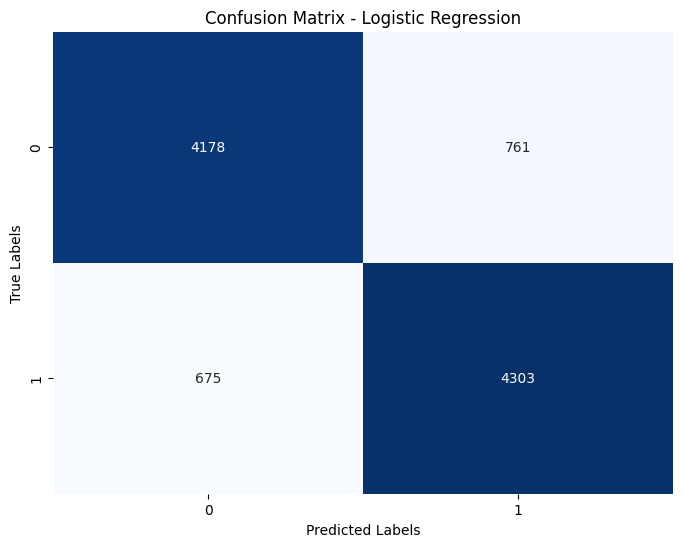

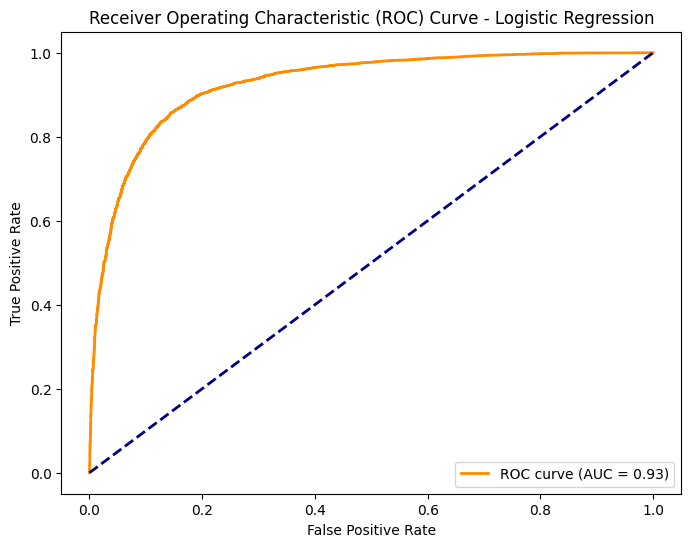

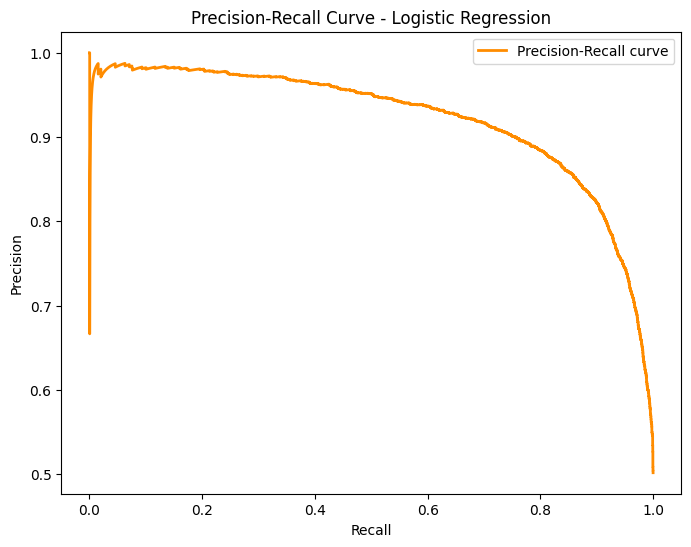

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
cm_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test_logistic, logistic_model.predict_proba(X_test_logistic)[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_logistic))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test_logistic, logistic_model.predict_proba(X_test_logistic)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_logistic, precision_logistic, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='upper right')
plt.show()



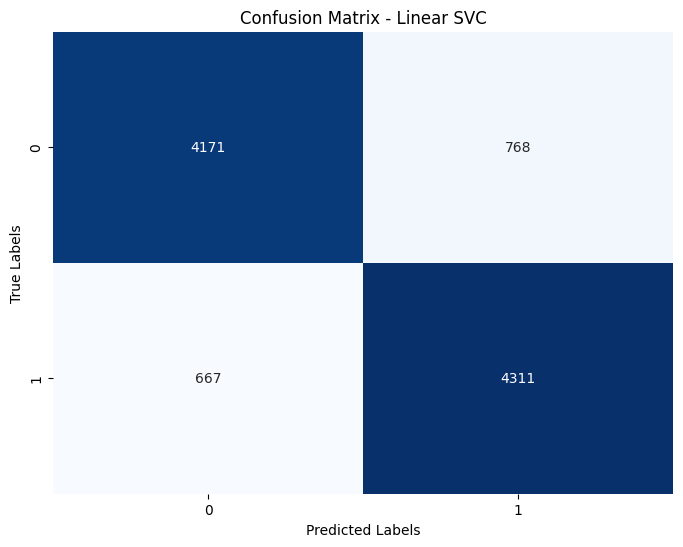

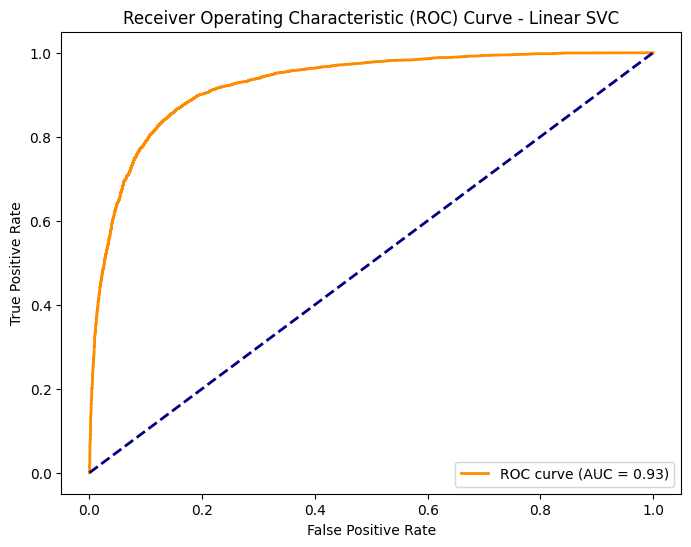

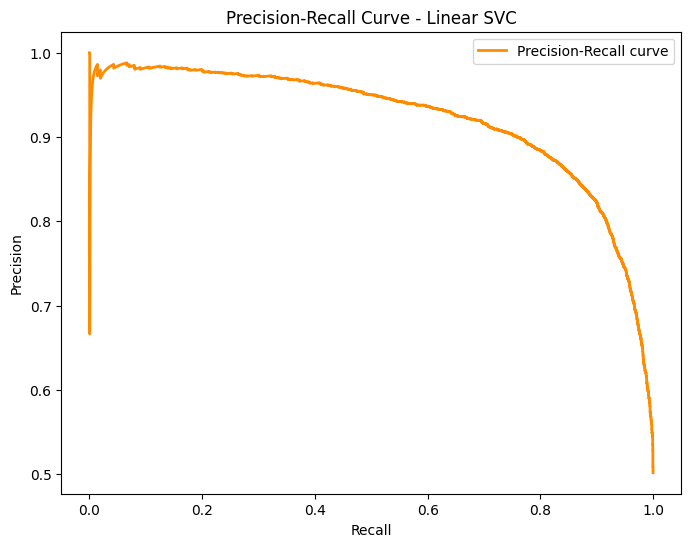

In [66]:
# Create a heatmap for the confusion matrix
cm_svc = confusion_matrix(y_test_svc, y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Linear SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr_svc, tpr_svc, _ = roc_curve(y_test_svc, svc_model.decision_function(X_test_svc))
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_svc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Linear SVC')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_svc, recall_svc, _ = precision_recall_curve(y_test_svc, svc_model.decision_function(X_test_svc))

plt.figure(figsize=(8, 6))
plt.plot(recall_svc, precision_svc, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Linear SVC')
plt.legend(loc='upper right')
plt.show()


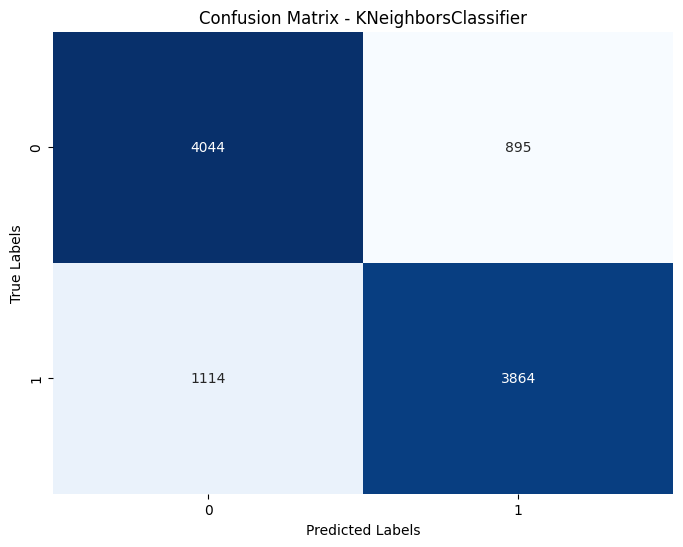

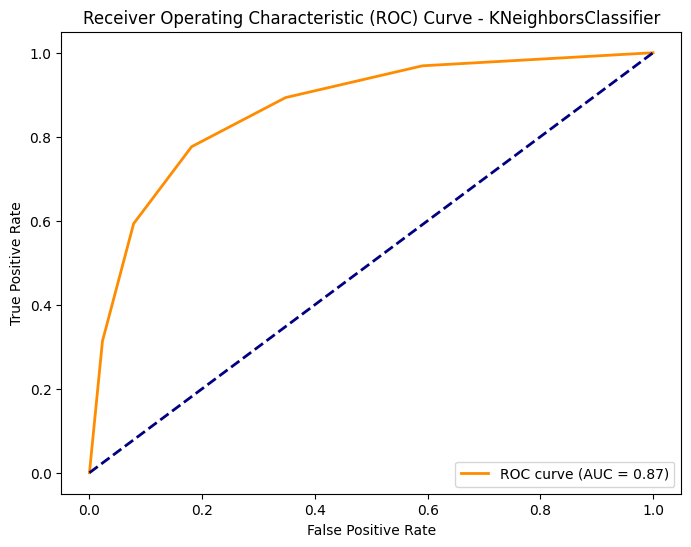

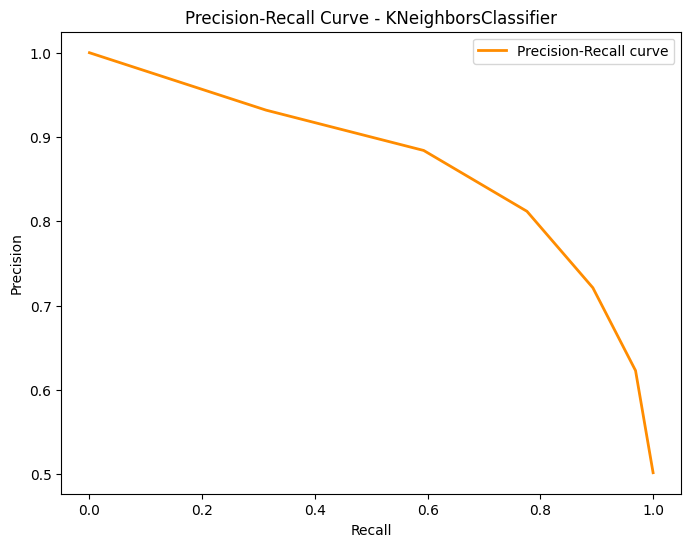

In [70]:
# Create a heatmap for the confusion matrix
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNeighborsClassifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test_knn, knn_model.predict_proba(X_test_knn)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNeighborsClassifier')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test_knn, knn_model.predict_proba(X_test_knn)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNeighborsClassifier')
plt.legend(loc='upper right')
plt.show()


310/310 [==============================] - 1s 4ms/step


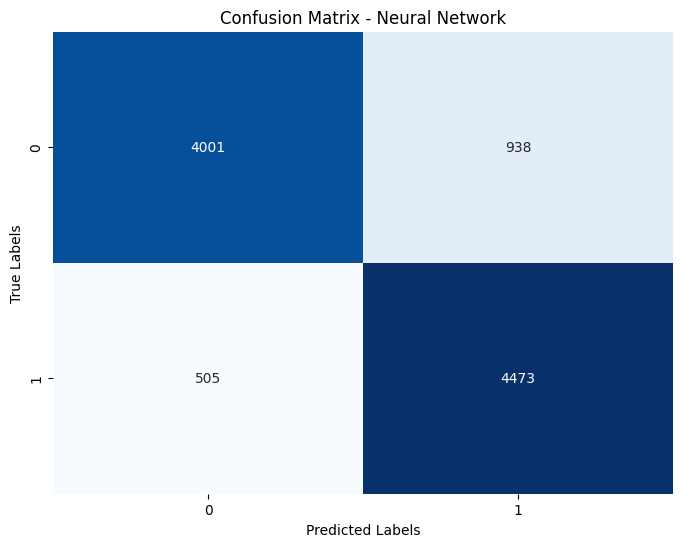

310/310 [==============================] - 1s 3ms/step


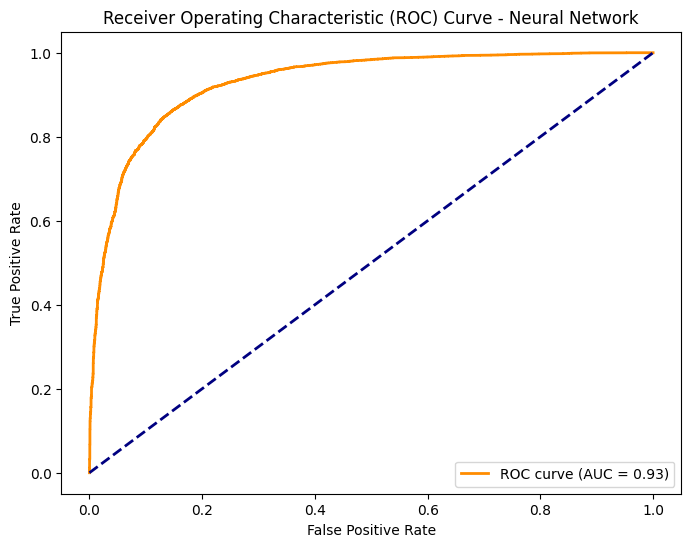

310/310 [==============================] - 1s 4ms/step


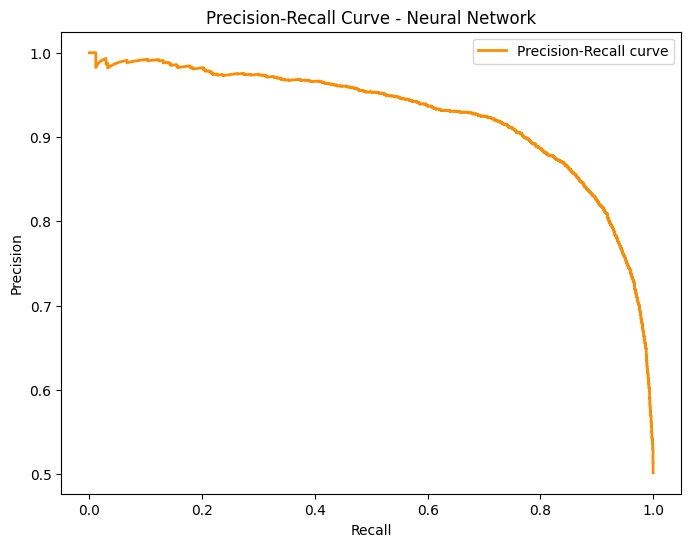

In [72]:
# Create a heatmap for the confusion matrix
y_pred_nn = (model_nn.predict(X_test_nn) > 0.5).astype("int32")  # Adjust threshold as needed
cm_nn = confusion_matrix(y_test_nn, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test_nn, model_nn.predict(X_test_nn))
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_nn, recall_nn, _ = precision_recall_curve(y_test_nn, model_nn.predict(X_test_nn))

plt.figure(figsize=(8, 6))
plt.plot(recall_nn, precision_nn, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Neural Network')
plt.legend(loc='upper right')
plt.show()


310/310 [==============================] - 2s 5ms/step


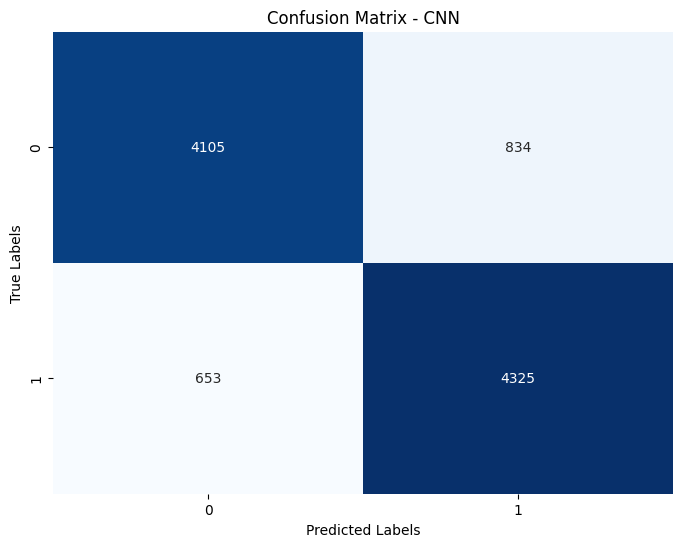

310/310 [==============================] - 2s 5ms/step


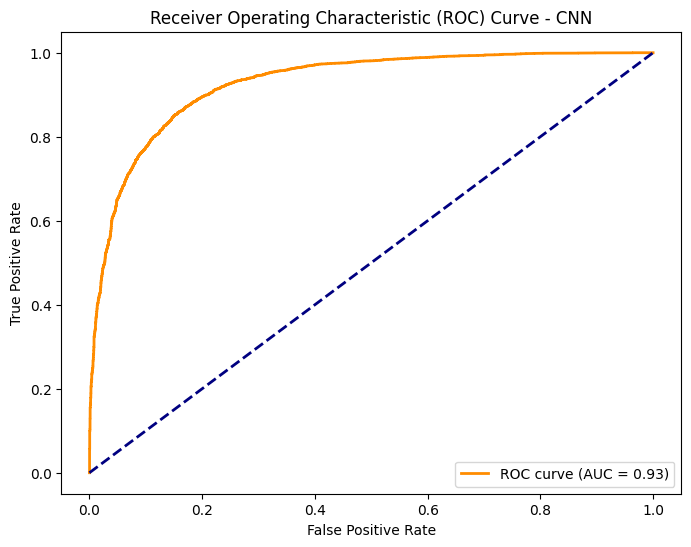

310/310 [==============================] - 1s 3ms/step


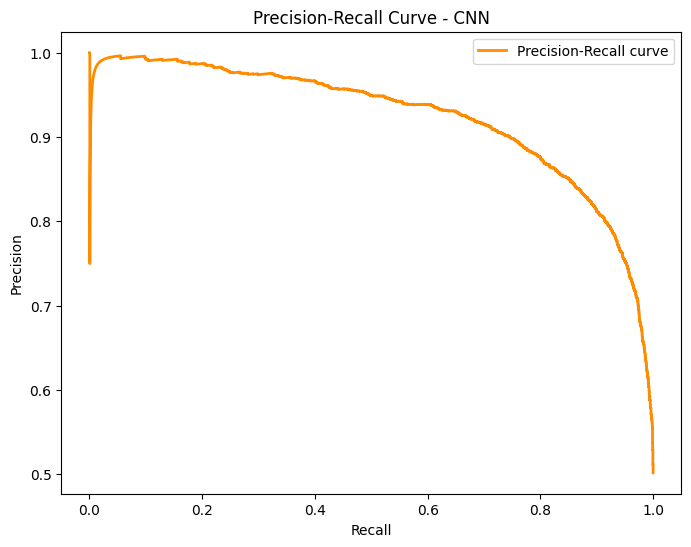

In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
X_test_cnn = X_test_nn.reshape(X_test_nn.shape[0], X_test_nn.shape[1], 1)

y_pred_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")  # Adjust threshold as needed
cm_cnn = confusion_matrix(y_test_nn, y_pred_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_nn, model_cnn.predict(X_test_cnn))
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_cnn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CNN')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_cnn, recall_cnn, _ = precision_recall_curve(y_test_nn, model_cnn.predict(X_test_cnn))

plt.figure(figsize=(8, 6))
plt.plot(recall_cnn, precision_cnn, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - CNN')
plt.legend(loc='upper right')
plt.show()



# Done

All set!

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook. Please make sure all the plotted tables and figures are in the notebook.

* **PDF Report**: please prepare a report in the PDF form which should be at least 4 pages. The report should includes:

  * Data description and exploration.

  * Data preproccessing.

  * Data modelling.

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)
  
Please compress all the files in a zipped file.